#Delayed Rectifier Potassium Channel
First we have an IV curve for Kdr activation with units $\frac{pA}{pF}$ the equations we need for calculating minf are:

$\frac{I}{C}=\frac{G}{C}^*(v-EK)$ and $G=G_{max}^*m_{\infty}$ the capacitance is on both sides of the equation so cancels.

Populating the interactive namespace from numpy and matplotlib


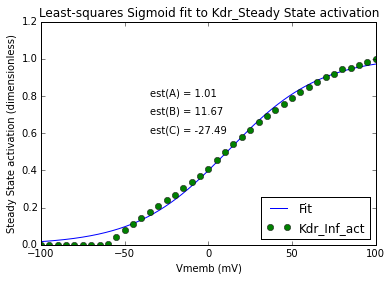

In [6]:
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_Kdr_kinetics.xlsx")
tvm = xl.parse("Kdr_amp")

# set parameters
v = tvm.columns
y = tvm.T['mean']
EK = -86.5
Gmax = 307.6/(100-EK)
df = (v-EK)
G = y/df
y = G/Gmax

#sigmoid fit
def func(v, A, B, C):
    """Sigmoid equation."""
    return A/(1+(np.exp((v-B)/C)))

def residuals(p, y, v):
    """Deviations of data from fitted E curve"""
    A,B,C = p
    err = y-func(v, A, B, C)
    return err

def peval(v, p):
    """Evaluated value at v with current parameters."""
    A,B,C = p
    return func(v, A, B, C)

# Initial guess for parameters
p0 = [1, -30,-15]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, v))

# Plot results
vv = np.linspace(-100, 100, num=2000)
plt.plot(vv,peval(vv,plsq[0]),v,y,'o')
plt.title('Least-squares Sigmoid fit to Kdr_Steady State activation')
plt.xlabel('Vmemb (mV)')
plt.ylabel('Steady State activation (dimensionless)')
plt.legend(['Fit', 'Kdr_Inf_act'], loc='lower right')
for i, (param, est) in enumerate(zip('ABCD', plsq[0])):
    plt.text(-35, 0.8-i*0.1, 'est(%s) = %.2f' % (param, est))

**Not a great match of the Experimental Kdr Steady activation with the simple Sigmoid fit, try a linear fit:**

Populating the interactive namespace from numpy and matplotlib


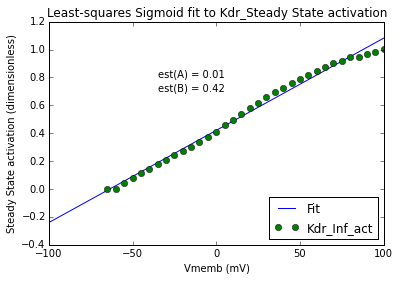

In [6]:
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_Kdr_kinetics.xlsx")
tvm = xl.parse("Kdr_amp")

# remove columns less than -55
tvm1 = tvm.T[7:]
tvm1 = tvm1.T

# set parameters
v = tvm1.columns
y = tvm1.T['mean']
EK = -86.5
Gmax = 307.6/(100-EK)
df = (v-EK)
G = y/df
y = G/Gmax

#sigmoid fit
def func(v, A, B):
    """Linear equation."""
    return (A*v) + B

def residuals(p, y, v):
    """Deviations of data from fitted E curve"""
    A,B = p
    err = y-func(v, A, B)
    return err

def peval(v, p):
    """Evaluated value at v with current parameters."""
    A,B = p
    return func(v, A, B)

# Initial guess for parameters
p0 = [1, -30]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, v))

# Plot results
vv = np.linspace(-100, 100, num=2000)
plt.plot(vv,peval(vv,plsq[0]),v,y,'o')
plt.title('Least-squares Sigmoid fit to Kdr_Steady State activation')
plt.xlabel('Vmemb (mV)')
plt.ylabel('Steady State activation (dimensionless)')
plt.legend(['Fit', 'Kdr_Inf_act'], loc='lower right')
for i, (param, est) in enumerate(zip('ABC', plsq[0])):
    plt.text(-35, 0.8-i*0.1, 'est(%s) = %.2f' % (param, est))

**Linear fit is better, will have to close the gate around Vm = -65 with and If... else... statement**

**Wait a minute that fit is wrong as it would give the zero value at -42 mV not -65 mV not sure why it is plotting correctly. I think this calls for a manual fit:**

Populating the interactive namespace from numpy and matplotlib


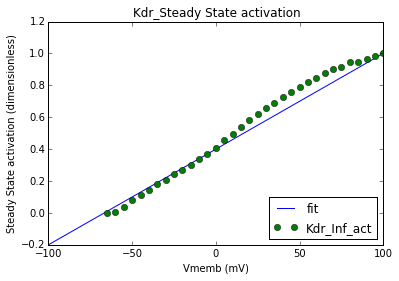

In [20]:
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_Kdr_kinetics.xlsx")
tvm = xl.parse("Kdr_amp")

# remove columns less than -55
tvm1 = tvm.T[7:]
tvm1 = tvm1.T

# set parameters
v = tvm1.columns
y = tvm1.T['mean']
EK = -86.5
Gmax = 307.6/(100-EK)
df = (v-EK)
G = y/df
y = G/Gmax
vv = np.linspace(-100, 100, num=2000)
A = 0.006
B = 0.40
fit = A*vv + B

# Plot results
plt.plot(vv, fit, v,y,'o')
plt.title('Kdr_Steady State activation')
plt.xlabel('Vmemb (mV)')
plt.ylabel('Steady State activation (dimensionless)')
plt.legend(['fit','Kdr_Inf_act'], loc='lower right')
#y.tail()

**Now to try and fit the Kdr activation Tau, it is a funny shaped curve, so it might be tricky.**

Populating the interactive namespace from numpy and matplotlib


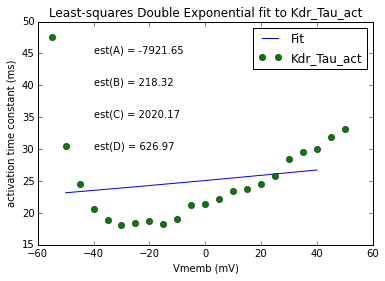

In [19]:
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_Kdr_kinetics.xlsx")
tvm = xl.parse("Kdr_tau_act")

# set parameters for curve-fit
v = tvm.columns
y = tvm.T['mean']
#plt.plot(v, y, 'o')
#plt.title('iAMC_Kdr Tau Activation')
#plt.xlabel('Vmemb (mV)')
#plt.ylabel('Kdr Tau Activation (ms)')

def func(v, A, B, C, D):
    """Double Exponential equation."""
    return 1/((np.exp((v+A)/B))+(np.exp((-v-C)/D)))

def residuals(p, y, v):
    """Deviations of data from fitted DE curve"""
    A,B,C,D = p
    err = y-func(v, A, B, C,D)
    return err

def peval(v, p):
    """Evaluated value at v with current parameters."""
    A,B,C,D = p
    return func(v, A, B, C,D)

# Initial guess for parameters
# p0 = [60, 5, 8]
p0 = [34, 10, -67,15]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, v))

# Plot results
vv = np.linspace(-50, 40, num=501)
plt.plot(vv,peval(vv,plsq[0]),v,y,'o')
plt.title('Least-squares Double Exponential fit to Kdr_Tau_act')
plt.xlabel('Vmemb (mV)')
plt.ylabel('activation time constant (ms)')
plt.legend(['Fit', 'Kdr_Tau_act'], loc='upper right')
for i, (param, est) in enumerate(zip('ABCD', plsq[0])):
    plt.text(-40, 45-i*5, 'est(%s) = %.2f' % (param, est))
#plt.savefig('iAMC_Kdr_Tau_act.png')

**As predicted that is a tricky curve to find a good fit to, need to find the right equation format. Marc has done an exponentia fit and a polynomial fit:**

Populating the interactive namespace from numpy and matplotlib


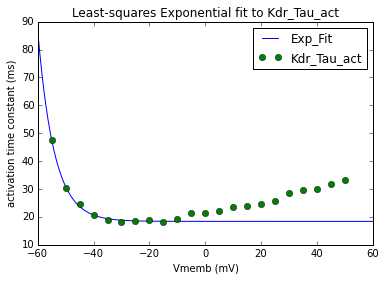

In [13]:
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_Kdr_kinetics.xlsx")
tvm = xl.parse("Kdr_tau_act")

# set parameters 
v = tvm.columns
y = tvm.T['mean']
vv = np.linspace(-60, 60, num=501)
Exp_Fit = 29.156*exp(-(vv+55)/5.8842) + 18.394
# Plot results

plt.plot(vv,Exp_Fit,v,y,'o')
plt.title('Least-squares Exponential fit to Kdr_Tau_act')
plt.xlabel('Vmemb (mV)')
plt.ylabel('activation time constant (ms)')
plt.legend(['Exp_Fit', 'Kdr_Tau_act'], loc='upper right')

**The exponential fit might have too large a value below -60, so calculate the value at -60 and fix at that value with an If else statement:**

In [14]:
vv = -60
bc = 29.156*exp(-(vv+55)/5.8842) + 18.394
print bc

86.5905452427


**Now for Marc's Polynomial fit:**

Populating the interactive namespace from numpy and matplotlib


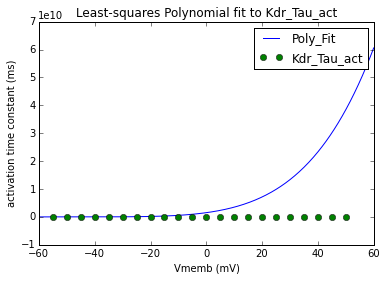

In [3]:
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_Kdr_kinetics.xlsx")
tvm = xl.parse("Kdr_tau_act")

# set parameters 
v = tvm.columns
y = tvm.T['mean']
vv = np.linspace(-60, 60, num=501)
Poly_Fit = 44.036*(vv+55)-2.3544*(pow((vv+55), 2))+0.068234*(pow((vv+55), 3))-0.00076059*(pow((vv+55), 4))+3.0113*(pow((vv+55), 5))
# Plot results

plt.plot(vv,Poly_Fit,v,y,'o')
plt.title('Least-squares Polynomial fit to Kdr_Tau_act')
plt.xlabel('Vmemb (mV)')
plt.ylabel('activation time constant (ms)')
plt.legend(['Poly_Fit', 'Kdr_Tau_act'], loc='upper right')

**I need to check the polynomial equation with Marc**

**Next the Kdr Deactivation Tau curve:**

Populating the interactive namespace from numpy and matplotlib


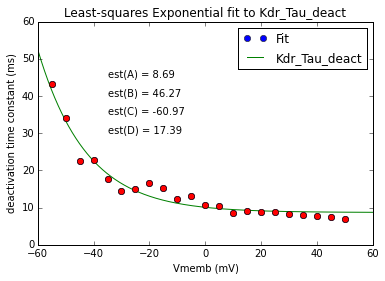

In [34]:
#load python packages
%pylab inline
import pandas as pd
from scipy.optimize import leastsq

#load data from Excel Spread Sheet
xl = pd.ExcelFile("iAMC_Kdr_kinetics.xlsx")
tvm = xl.parse("Kdr_tau_deact")

# set parameters for curve-fit
v = tvm.columns
y = tvm.T['mean']
#plt.plot(v, y, 'o')
#plt.title('iAMC_Kdr Tau Deactivation')
#plt.xlabel('Vmemb (mV)')
#plt.ylabel('Kdr Tau Deactivation (ms)')
def func(v, A, B, C, D):
    """Exponential equation."""
    return A+(B/(np.exp((v-C)/D)))

def residuals(p, y, v):
    """Deviations of data from fitted E curve"""
    A,B,C,D = p
    err = y-func(v, A, B, C,D)
    return err

def peval(v, p):
    """Evaluated value at v with current parameters."""
    A,B,C,D = p
    return func(v, A, B, C,D)

# Initial guess for parameters
# p0 = [60, 5, 8]
p0 = [7, 62, -67,15]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, v))

# Plot results
vv = np.linspace(-60, 60, num=2000)
plt.plot(vv,peval(vv,plsq[0]),v,y,'o')
plt.title('Least-squares Exponential fit to Kdr_Tau_deact')
plt.xlabel('Vmemb (mV)')
plt.ylabel('deactivation time constant (ms)')
plt.legend(['Fit', 'Kdr_Tau_deact'], loc='upper right')
for i, (param, est) in enumerate(zip('ABCD', plsq[0])):
    plt.text(-35, 45-i*5, 'est(%s) = %.2f' % (param, est))
#plt.savefig('iAMC_Kdr_Tau_act.png')

**Use an If Else statement to cap the exponential below -60. Here I calculate the value at _60.**

In [5]:
A = 8.69
B = 46.27
C = -60.97
D = 17.39
v = -60
ntau = A+(B/(np.exp((v-C)/D)))
print ntau

52.4497576301


**Change the sign on the scale value of activation steady state to give deactivation steady state:**

Populating the interactive namespace from numpy and matplotlib


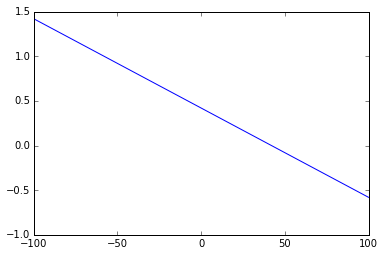

In [3]:
%pylab inline
A = - 0.01
B = 0.42
v = np.linspace(-100, 100, num=2000)
ninf = A*v + B
plt.plot(v, ninf)

**Here are the neuroConstruct generated plots:**
![alt text](act_var_plots.png)
**Activation Gate Variables**
![alt text](Deact_var_plots.png)
**Deactivation Gate Variables**

**In a simulation with Nax, Kdr, KA, NaP, CaR, Ca_pool, BK and leak this version of the Kdr produced the following Vm plot:**

![alt text](Sim_54.png)

**The after hyperpolarisation is still a problem. Looking at the Kdr channel conductance compared KA channel it can be seen that the Kdr channel is conducting for an extended period after the burst firing. It also should be noticed that there is a negative conductance at the start of the burst. This negative conductance needs fixing before we attempt to correct the after hyperpolarisation.**

![alt text](Sim_54_gKdr_gKA.png)

**To fix the negative conductance in the Kdr channel model, we need to set a boundary condition for the steady state equations for both activation and inactivation.**

**While doing this I noticed that the Least Squares Linear fit for Kdr steady state activation was wrong as it was not zero at -65 but at -42. So I have redone the fit manualy (see above). Setting the boundary conditions with an if else statement cured the negative conductance:**

![alt text](Sim_55_gKdr_gKA.png)

**To tidy things up, I will synchronise the boundary conditions for the tau variables to -66.67, so I need to recalculate these figures:**

In [21]:
vv = -66.67
bc = 29.156*exp(-(vv+55)/5.8842) + 18.394
print bc

230.256604897


In [23]:
A = 8.69
B = 46.27
C = -60.97
D = 17.39
v = -66.67
ntau = A+(B/(np.exp((v-C)/D)))
print ntau

72.9070265127


**This adjustment to tau boundary conditions has the effect of extending the conductance of the Kdr channel:**
![alt text](Sim_56_gKdr_gKA.png)

**So lets play with the tau deactivation parameters:**

Populating the interactive namespace from numpy and matplotlib


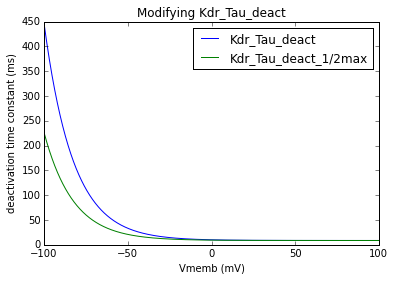

In [29]:
%pylab inline
base = 8.69
Max = 46.27
Max1 = 23
midpoint = -60.97
scale = 17.39
v = np.linspace(-100, 100, num=2000)
ntau = base+(Max/(np.exp((v-midpoint)/scale)))
ntau1 = base+(Max1/(np.exp((v-midpoint)/scale)))
plt.plot(v, ntau, v, ntau1)
plt.title('Modifying Kdr_Tau_deact')
plt.xlabel('Vmemb (mV)')
plt.ylabel('deactivation time constant (ms)')
plt.legend(['Kdr_Tau_deact', 'Kdr_Tau_deact_1/2max'], loc='upper right')

In [31]:
A = 8.69
B = 23
C = -60.97
D = 17.39
v = -66.67
ntau = A+(B/(np.exp((v-C)/D)))
print ntau, 'Boundary Condition Kdr Tau deact 1/2 max'

40.6111499847 Boundary Condition Kdr Tau deact 1/2 max


**Reducing the Kdr deactivation tau curve to 1/2 its maximum height, has little effect on the Kdr conductance curve:**

![alt text](Sim_57_gKdr_gKA.png)

Populating the interactive namespace from numpy and matplotlib


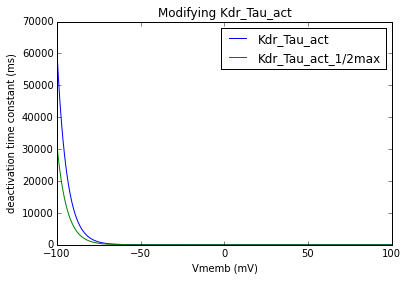

In [35]:
%pylab inline
base = 18.394
Max = 29.156
Max1 = 15
midpoint = -55
scale = 5.8842
v = np.linspace(-100, 100, num=2000)
htau = Max*exp(-(v-midpoint)/scale) + base
htau1 = Max1*exp(-(v-midpoint)/scale) + base
plt.plot(v, htau, v, htau1)
plt.title('Modifying Kdr_Tau_act')
plt.xlabel('Vmemb (mV)')
plt.ylabel('deactivation time constant (ms)')
plt.legend(['Kdr_Tau_act', 'Kdr_Tau_act_1/2max'], loc='upper right')

In [36]:
vv = -66.67
bc = 15*exp(-(vv+55)/5.8842) + 18.394
print bc, 'Boundary Condition Kdr Tau act 1/2 max'

127.391773133 Boundary Condition Kdr Tau act 1/2 max


**Reducing the Kdr activation tau curve to 1/2 its maximum height, has a greater effect than found for the deactivation tau on the Kdr conductance curve:**

![alt text](Sim_58_gKdr_gKA.png)

Populating the interactive namespace from numpy and matplotlib


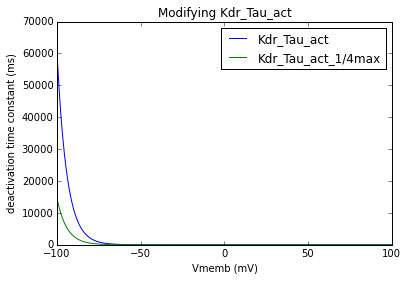

In [37]:
%pylab inline
base = 18.394
Max = 29.156
Max1 = 7
midpoint = -55
scale = 5.8842
v = np.linspace(-100, 100, num=2000)
htau = Max*exp(-(v-midpoint)/scale) + base
htau1 = Max1*exp(-(v-midpoint)/scale) + base
plt.plot(v, htau, v, htau1)
plt.title('Modifying Kdr_Tau_act')
plt.xlabel('Vmemb (mV)')
plt.ylabel('deactivation time constant (ms)')
plt.legend(['Kdr_Tau_act', 'Kdr_Tau_act_1/4max'], loc='upper right')

In [39]:
vv = -66.67
bc = 7*exp(-(vv+55)/5.8842) + 18.394
print bc, 'Boundary Condition Kdr Tau act 1/4 max'

69.2596274619 Boundary Condition Kdr Tau act 1/4 max


**Reducing the Kdr activation tau curve further to 1/4 its maximum height, has a an even greater effect on the Kdr conductance curve:**

![alt text](Sim_59_gKdr_gKA.png)

**But there is still no noticable effect on the after hyperpolarisation:**

![alt text](Sim_59_Vm.png)

**Clearly we need a strategy that will make Kdr deactivation more effective. Lets take a look at all the Gating variable curves plotted together:**

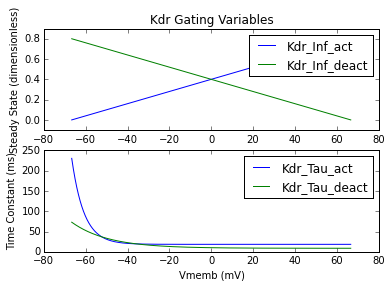

In [42]:
v = np.linspace(-66.67, 66.67, num=2000)
minf = 0.006*v + 0.40
ninf = -0.006*v + 0.40
subplot(2,1,1)
plt.plot(v, minf, v, ninf)
plt.title('Kdr Gating Variables')
plt.ylabel('Steady State (dimensionless)')
plt.legend(['Kdr_Inf_act', 'Kdr_Inf_deact'], loc='upper right')
mtau = 29.156*exp(-(v+55)/5.8842) + 18.394
ntau = 8.69 +(46.27/(exp((v + 60.97)/17.39)))
subplot(2,1,2)
plt.plot(v, mtau, v, ntau)
plt.xlabel('Vmemb (mV)')
plt.ylabel('Time Constant (ms)')
plt.legend(['Kdr_Tau_act', 'Kdr_Tau_deact'], loc='upper right')

**We are trying to stop the after hyperpolarisation so it would make sense for deactivation to be most intense at lower membrane potentials. So I have set an if else statement that sets the deactivation steady state to 0 at Vm < a set value and increased it up to -45 with Kdr activation tau max set at 1/2:**

![alt text](Sim_60_Vm.png)

**Then increasing the Kdr activation Tau max value up to the full fitted value, I could increase the zero setting for deactivation a little further up to -42 to give a similar bursting pattern:**

![alt text](Sim_61_Vm.png)